# Ejercicio 7 Ley de Zipf

In [1]:
import tokenizer
import numpy as np
from matplotlib import pyplot as plt

In [2]:

lista_terminos = []
dicc={}
with open("stop-words.txt", encoding="UTF-8") as stop_words:
    filedata = stop_words.read()
    lista_vacias=filedata.split("\n")
with open("ej7/quijote.txt", encoding="utf-8",errors="ignore") as f:
    filedata=f.read()
    lista_tokens=tokenizer.tokenizar(filedata)
    lista_tokens=tokenizer.sacar_palabras_vacias(lista_tokens,lista_vacias)
    
    for token in lista_tokens:
        if token not in lista_terminos:
           lista_terminos.append(token) 
           dicc[token]=1
        else:
           cf=dicc[token]
           cf=cf+1
           dicc[token]=cf 
    ##print(dicc)

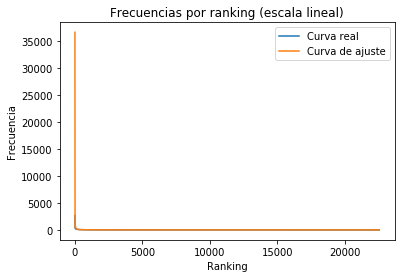

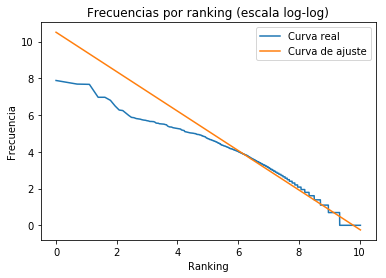

In [3]:
ordered_terms = sorted(dicc.values(), reverse=True)  ####!!!!!!!!!
lista_freq=[]
for token in ordered_terms:
    cf=token
    lista_freq.append(cf)
##print (lista_freq)

x = range(1, len(lista_freq)+1)
y = lista_freq
log_x = np.log(x)
log_y = np.log(y)


coeficients = np.polyfit(log_x, log_y, 1)
adjusted_curve = np.poly1d(coeficients)
log_y_pred = adjusted_curve(log_x)
y_pred = [np.exp(y) for y in log_y_pred]

plt.title("Frecuencias por ranking (escala lineal)")
plt.xlabel("Ranking")
plt.ylabel("Frecuencia")
plt.plot(x, y, x, y_pred)
plt.legend(("Curva real", "Curva de ajuste"), loc="upper right")
plt.show()

plt.title("Frecuencias por ranking (escala log-log)")
plt.xlabel("Ranking")
plt.ylabel("Frecuencia")
plt.plot(log_x, log_y, log_x, log_y_pred)
plt.legend(("Curva real", "Curva de ajuste"), loc="upper right")
plt.show()


La predicción no es buena para los valores con mayor frecuencia.


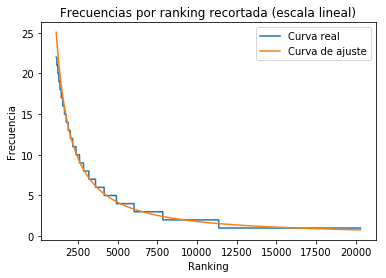

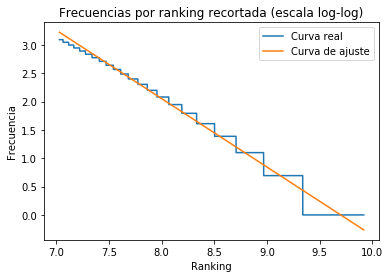

In [4]:
index_inicial = int(len(x)*0.05)
index_final = int(len(x) - len(x)*0.1)

log_x_cut = log_x[index_inicial:index_final]
log_y_cut = log_y[index_inicial:index_final]
x_cut = x[index_inicial:index_final]
y_cut = y[index_inicial:index_final]


log_x_cut = log_x[index_inicial:index_final]
log_y_cut = log_y[index_inicial:index_final]
x_cut = x[index_inicial:index_final]
y_cut = y[index_inicial:index_final]


coeficients_cut = np.polyfit(log_x_cut, log_y_cut, 1)
adjusted_curve_cut = np.poly1d(coeficients_cut)
log_y_pred_cut = adjusted_curve_cut(log_x_cut)
y_pred_cut = [np.exp(y) for y in log_y_pred_cut]

plt.title("Frecuencias por ranking recortada (escala lineal)")
plt.xlabel("Ranking")
plt.ylabel("Frecuencia")
plt.plot(x_cut, y_cut, x_cut, y_pred_cut)
plt.legend(("Curva real", "Curva de ajuste"), loc="upper right")
plt.show()

plt.title("Frecuencias por ranking recortada (escala log-log)")
plt.xlabel("Ranking")
plt.ylabel("Frecuencia")
plt.plot(log_x_cut, log_y_cut, log_x_cut, log_y_pred_cut)
plt.legend(("Curva real", "Curva de ajuste"), loc="upper right")
plt.show()


Ajustando un 5% en los valores inciales y un 10% en los finales obtenemos una mejor predicción de la curva real.


# Ejercicio 8 Ley de Zipf


In [5]:
m = coeficients[0]
c = coeficients[1]

def rank_freq(f, c=c, m=m):
    f = np.log(f)
    return np.exp((f - c) / m)

def freq_term(f):
    rank_x = rank_freq(f)
    rank_next = rank_freq(f-1)
    print("Ranking del termino con frecuencia  " + str(f) + ": " + str(rank_x))
    print("Ranking del termino con frecuencia " + str(f-1) + ": " + str(rank_next))
    print("Frecuencia del termino con frecuencia " + str(f) + ": " + str(rank_next - rank_x))
    
f_list = [100, 1000, 10000]
for f in f_list:
    freq_term(f)

Ranking del termino con frecuencia  100: 244.73265753503713
Ranking del termino con frecuencia 99: 247.03484582313206
Frecuencia del termino con frecuencia 100: 2.302188288094925
Ranking del termino con frecuencia  1000: 28.647258891662606
Ranking del termino con frecuencia 999: 28.673972732308815
Frecuencia del termino con frecuencia 1000: 0.02671384064620952
Ranking del termino con frecuencia  10000: 3.3533139805358854
Ranking del termino con frecuencia 9999: 3.3536264084095633
Frecuencia del termino con frecuencia 10000: 0.0003124278736779118


Se obtiene que los términos con frecuencia 100 son 2 y que no existen términos con frecuencias 1000 o 10000.


In [6]:
def freq_term(lista_freq, f):
    i = 0
    count = 0
    while lista_freq[i] >= f:
        if (lista_freq[i] == f):
            count += 1
        i += 1
    return count

for f in f_list:
    print("Frecuencia real del término " + str(f) + ": " + str(freq_term(lista_freq, f)))

Frecuencia real del término 100: 2
Frecuencia real del término 1000: 0
Frecuencia real del término 10000: 0


Se concluye que la predicción es correcta

# Ejercicio 9 Ley de Heap


In [20]:
import tokenizer
import numpy as np
from matplotlib import pyplot as plt

lista_terminos = []
palabras_totales = []
palabras_unicas = []
dicc={}
cont_terminos=0
with open("stop-words.txt", encoding="UTF-8") as stop_words:
    filedata = stop_words.read()
    lista_vacias=filedata.split("\n")
with open("cisi/CISI.ALL", encoding="utf-8",errors="ignore") as f:
    filedata=f.read()
    lista_tokens=tokenizer.tokenizar(filedata)
    lista_tokens=tokenizer.sacar_palabras_vacias(lista_tokens,lista_vacias)
    vocabulario=[]
    lista_palabras=[]
    for key,token in enumerate(lista_tokens):
        if token not in vocabulario:
            vocabulario.append(token)         
        palabras_totales.append(key) 
        palabras_unicas.append(len(vocabulario))  

##print(total_words)
##print(unique_words)

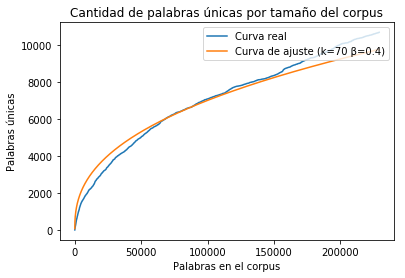

In [21]:
import numpy as np
from matplotlib import pyplot as plt

def calculate_heaps(palabras_totales,  k, beta):
    y_pred = []
    for palabras in range(1, len(palabras_totales) + 1):
        y_pred.append(k * palabras ** beta)
    return y_pred

def mean_square_error(v_y, v_yi):
    sum = 0
    for index in range(len(v_y)):
        sum += (v_y[index] - v_yi[index])**2
    return sum / len(v_y)

mejor_k =10
mejor_beta=0.3
k=1
beta=0.3
y_prediction = calculate_heaps(palabras_totales, k*10, beta)
mse = mean_square_error(palabras_unicas, y_prediction)
# k from 10 to 100
for k in range(1, 9):
    for beta in range(3, 9):
        y_pred_aux = calculate_heaps(palabras_totales, k*10, beta/10)
        mse_aux = mean_square_error(palabras_unicas, y_pred_aux)
        if mse_aux < mse:
            y_prediction = y_pred_aux
            mse = mse_aux
            mejor_k = k*10
            mejor_beta = beta/10
      
plt.title("Cantidad de palabras únicas por tamaño del corpus")
plt.xlabel("Palabras en el corpus")
plt.ylabel("Palabras únicas")
plt.plot(palabras_totales, palabras_unicas, palabras_totales, y_prediction)
plt.legend(("Curva real", "Curva de ajuste (k=" + str(mejor_k) + " β=" + str(mejor_beta) + ")"), loc="upper right")
plt.show()

Utilizando como métrica de comparación el error cuadrado medio (mse) se obtiene que, si se varía k entre 10 y 90 en intervalos de 10 y a β entre 0,3 y 0,9 en intervalos de 0,05, el mejor ajuste se obtiene con valores de k = 70 y β = 0,4.

La ley de heaps no se satisface al 100%.